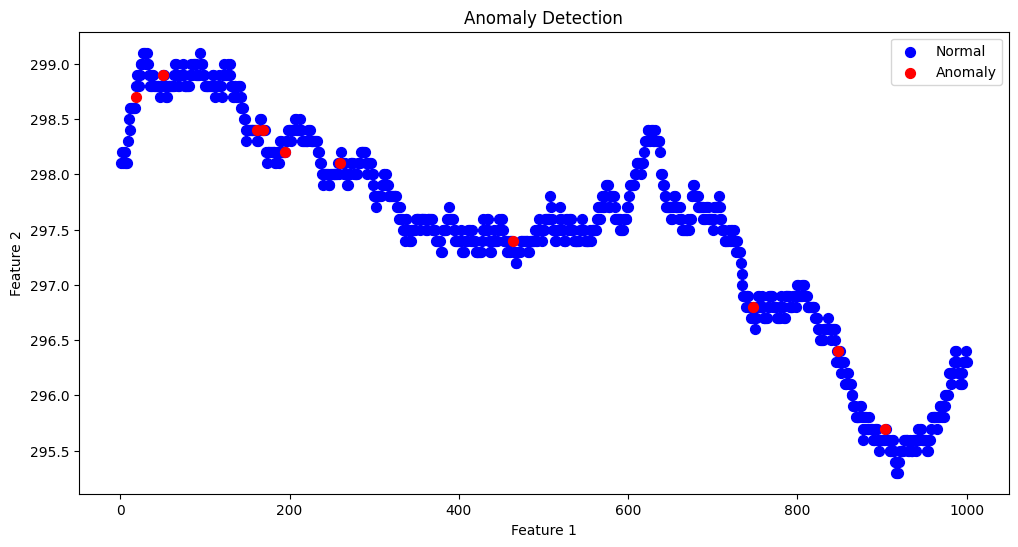

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load your dataset
file_path = 'final_dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Preprocess the data
data = data.select_dtypes(include=[float, int])  # Keep only numeric columns
data = data.fillna(data.median())  # Fill missing values

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.01)  # Adjust contamination according to your needs
model.fit(scaled_data)

# Predict anomalies
anomalies = model.predict(scaled_data)
data['Anomaly'] = anomalies

# Plotting
plt.figure(figsize=(12, 6))

# Plotting normal points
normal_data = data[data['Anomaly'] == 1]
plt.scatter(normal_data.iloc[:, 0], normal_data.iloc[:, 1], c='blue', label='Normal', s=50)

# Plotting anomalies
anomalies_data = data[data['Anomaly'] == -1]
plt.scatter(anomalies_data.iloc[:, 0], anomalies_data.iloc[:, 1], c='red', label='Anomaly', s=50)

plt.title('Anomaly Detection')
plt.xlabel('Feature 1')  # Replace with actual feature names
plt.ylabel('Feature 2')  # Replace with actual feature names
plt.legend()
plt.show()


In [6]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,operational_hours,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean,Anomaly
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,297.500400,308.344900,1539.51100,39.815900,109.262000,0.023000,2585.110000,2374.375754,0.008222,-0.016327,0.497000,0.000293,0.000490,-0.007812,0.007934,-0.016050,0.004363,0.980000
std,288.819436,0.935754,0.989815,183.93784,9.705455,63.837893,0.149978,1441.551468,1441.733272,1.002594,1.008499,0.500241,1.003547,1.031530,0.474076,0.419702,0.455991,0.432527,0.199097
min,1.000000,295.300000,305.700000,1168.00000,4.200000,0.000000,0.000000,111.000000,-43.059499,-1.731591,-1.724251,0.000000,-2.361901,-2.279597,-1.228806,-1.297415,-1.312040,-1.409718,-1.000000
25%,250.750000,296.900000,308.000000,1425.00000,33.475000,54.750000,0.000000,1314.000000,1051.040702,-0.877938,-0.933455,0.000000,-0.669722,-0.754810,-0.363922,-0.270602,-0.339765,-0.283228,1.000000
50%,500.500000,297.600000,308.500000,1502.50000,40.200000,110.000000,0.000000,2531.000000,2442.118062,0.036091,-0.042397,0.000000,-0.013911,0.009049,-0.007762,0.003790,-0.021752,-0.010728,1.000000
75%,750.250000,298.200000,309.000000,1610.00000,46.300000,164.000000,0.000000,3903.750000,3640.282612,0.880949,0.875624,1.000000,0.735613,0.739183,0.320539,0.274580,0.314885,0.285674,1.000000
max,1000.000000,299.100000,310.200000,2874.00000,76.200000,240.000000,1.000000,4995.000000,4869.004338,1.725342,1.714526,1.000000,2.261233,2.335029,1.373112,1.449112,1.253477,1.424750,1.000000


In [8]:
from sklearn.svm import OneClassSVM

In [10]:
# Initialize and fit the model
model = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)
model.fit(data)

# Predict anomalies
y_pred = model.predict(data)

In [13]:
import numpy as np
anomaly_values=data.iloc[np.where(y_pred==-1)]
print(anomaly_values)

     UDI  Air temperature [K]  Process temperature [K]  \
8      9                298.3                    308.7   
9     10                298.5                    309.0   
13    14                298.6                    309.2   
19    20                298.9                    309.3   
21    22                298.8                    309.3   
..   ...                  ...                      ...   
981  982                296.2                    306.8   
991  992                296.1                    307.0   
992  993                296.1                    307.1   
993  994                296.1                    307.1   
998  999                296.4                    307.2   

     Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
8                      1667         28.6               18       0   
9                      1741         28.0               21       0   
13                     1742         30.0               37       0   
19                     1632

In [4]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load your dataset
file_path = 'final_dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Preprocess the data
# Example: Drop non-numeric columns and fill missing values if necessary
data = data.select_dtypes(include=[float, int])  # Keep only numeric columns
data = data.fillna(data.median())  # Fill missing values

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.01)  # Adjust contamination according to your needs
model.fit(scaled_data)

# Predict anomalies
anomalies = model.predict(scaled_data)
data['Anomaly'] = anomalies

# -1 for anomalies, 1 for normal points
print(data)

# Save the results to a new CSV file
output_file = 'C:/Users/manis/OneDrive/Desktop/HACKERA/results.csv'
data.to_csv(output_file, index=False)


      UDI  Air temperature [K]  Process temperature [K]  \
0       1                298.1                    308.6   
1       2                298.2                    308.7   
2       3                298.1                    308.5   
3       4                298.2                    308.6   
4       5                298.2                    308.7   
..    ...                  ...                      ...   
995   996                296.3                    307.3   
996   997                296.3                    307.2   
997   998                296.3                    307.2   
998   999                296.4                    307.2   
999  1000                296.3                    307.1   

     Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                      1551         42.8                0       0   
1                      1408         46.3                3       0   
2                      1498         49.4                5       0   
3              